### Este notebook versa sobre simulação sobre fonte nuclear e sustentável.

In [10]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache

### Parametros tecnicos

In [11]:
# # Otimização de Manutenção com Recursão e Memoization
# Custos estimados de manutenção para componentes do reator
maintenance_costs = [500, 1000, 2000, 4000] # unidades monetárias
demanda = 1000  # Demanda base em MW -- valor mediano, representativo médio.
# numero de anos para analisar
years = 10
# Definir a demanda média para cada período do dia
demanda_diaria = [200, 500, 300, 400]  # Manhã, tarde, noite, madrugada em demanda em potência kW
# Custos médios por fonte de energia (simplificados para o exemplo)
custo_nuclear = 700  # Custo por MW de fonte nuclear
custo_renovavel = 60 # Custo por MW de fonte renovável

### Definicao de Funcoes

In [12]:
# Otimizacao de manutencao -- funcao
@lru_cache(maxsize=None)
def maintenance_optimization(year):
    """
    Calcula o custo mínimo de manutenção ao longo de um número de anos usando recursão e memoization.
    """
    if year <= 0: # resolver casos simples de primeira
        return 0
    min_cost = float('inf') # variavel numerica
    for i, cost in enumerate(maintenance_costs):
        if year - (i + 1) >= 0:
            min_cost = min(min_cost, cost + maintenance_optimization(year - (i + 1)))
    return min_cost

# Função para calcular custos acumulados ao longo dos anos
def calculate_cumulative_costs(years):
    cumulative_costs = []
    for year in range(1, years + 1):
        cumulative_costs.append(maintenance_optimization(year))
    return cumulative_costs

# # Dividir para Conquistar: Avaliação da Eficiência Energética em Períodos
# Função de dividir para conquistar para calcular o custo total por período
def calcular_custo_periodo(demanda, periodo):
    """
    Função recursiva que calcula o custo mínimo de energia ao longo dos períodos do dia,
    usando dividir para conquistar.
    """
    if periodo >= len(demanda): # resolver caso simples de primeira
        return 0

    # Dividir: escolher entre nuclear e renovável para o período atual -- usando recursao
    custo_usando_nuclear = demanda[periodo] * custo_nuclear + calcular_custo_periodo(demanda, periodo + 1)
    custo_usando_renovavel = demanda[periodo] * custo_renovavel + calcular_custo_periodo(demanda, periodo + 1)

    # Conquistar: escolher o menor custo para o período atual
    return min(custo_usando_nuclear, custo_usando_renovavel)

# # Simulação de Monte Carlo para Produção de Energia
# Função de simulação de Monte Carlo para produção de energia
def monte_carlo_energy_simulation(demand, simulations=1000):
    """
    Simula a produção de energia com incertezas usando o método de Monte Carlo.
    """
    production_data = []
    for _ in range(simulations):
        fluctuation = np.random.normal(0, 0.1)  # 10% de variação
        production = demand * (1 + fluctuation)
        production_data.append(production)
    return production_data

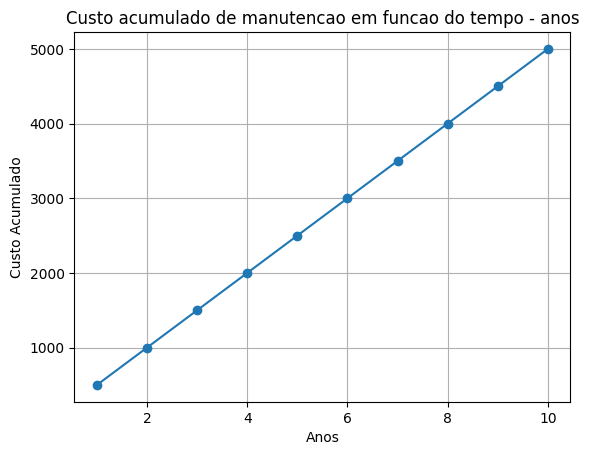

In [13]:
# plotagem dos custos acumulados
cumulative_costs = calculate_cumulative_costs(years)

plt.plot(range(1, years + 1), cumulative_costs, marker='o')
plt.title("Custo acumulado de manutencao em funcao do tempo - anos")
plt.xlabel("Anos")
plt.ylabel("Custo Acumulado")
plt.grid()
plt.show()

In [14]:
# Custo total ao longo dos quatro períodos do dia
custo_total = calcular_custo_periodo(demanda_diaria, 0)
print(f"Custo total para atender a demanda diária: {custo_total} unidades monetárias")

Custo total para atender a demanda diária: 84000 unidades monetárias


In [15]:
# Preparar dados para visualização
custos_nuclear = []
custos_renovavel = []
for i, demanda in enumerate(demanda_diaria):
    custo_nuclear_periodo = demanda * custo_nuclear
    custo_renovavel_periodo = demanda * custo_renovavel
    custos_nuclear.append(custo_nuclear_periodo)
    custos_renovavel.append(custo_renovavel_periodo)

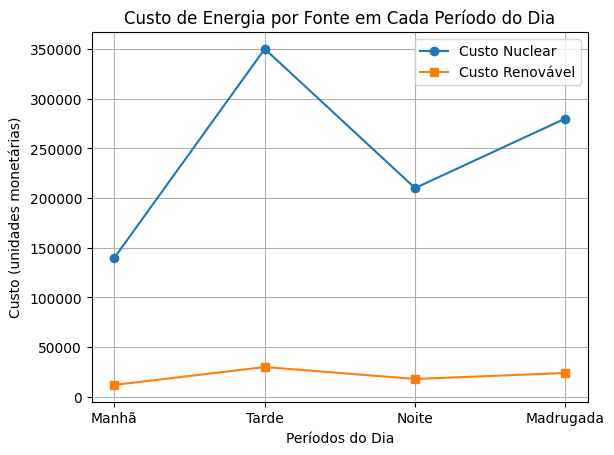

In [16]:
# Plotar os custos de cada fonte ao longo dos períodos
periodos = ['Manhã', 'Tarde', 'Noite', 'Madrugada']
plt.plot(periodos, custos_nuclear, label="Custo Nuclear", marker='o')
plt.plot(periodos, custos_renovavel, label="Custo Renovável", marker='s')
plt.title("Custo de Energia por Fonte em Cada Período do Dia")
plt.xlabel("Períodos do Dia")
plt.ylabel("Custo (unidades monetárias)")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Gerar dados da simulação
demand = 1000  # Demanda base em MW
production_data = monte_carlo_energy_simulation(demanda)

# Calcular média e desvio padrão da produção
mean_production = np.mean(production_data)
std_production = np.std(production_data)
print(f"Mean production: {mean_production:.2f} MW, Standard deviation: {std_production:.2f} MW")

Mean production: 1002.99 MW, Standard deviation: 99.83 MW


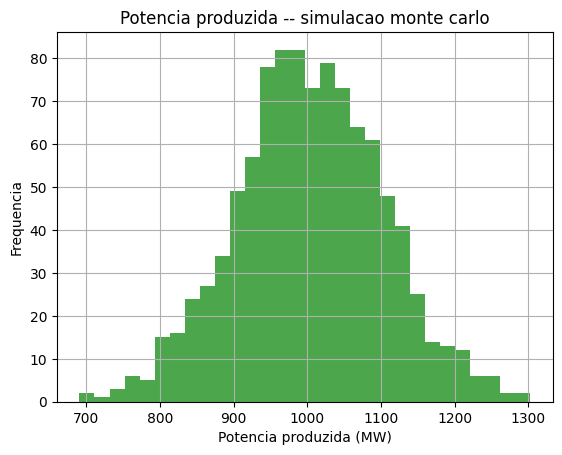

In [19]:
# Plotar histograma das variações de produção
plt.hist(production_data, bins=30, alpha=0.7, color = 'green')
plt.title("Potencia produzida -- simulacao monte carlo")
plt.xlabel("Potencia produzida (MW)")
plt.ylabel("Frequencia")
plt.grid()
plt.show()
